# Visualizing PUMS Data

In [1]:
import altair as alt
import pandas as pd
from pathlib import Path
from datetime import datetime as dt
from acs_download import tree

today = dt.today().strftime("%d-%b-%y")

C:\Users\sanchez\AppData\Local\Continuum\anaconda3\envs\census\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
RAW_DATA = Path("../data/raw/")
INTERIM_DATA = Path("../data/interim/")

In [3]:
tree(INTERIM_DATA)

+ ..\data\interim
    + ACS_2017
        + oh
            + ACS2017_PUMS_README.pdf
            + psam_p39.csv
    + educ_attainment_by_nativity-11-Apr-19.csv


In [4]:
data = pd.read_csv(INTERIM_DATA / "educ_attainment_by_nativity-11-Apr-19.csv")

data.head()

,NATIVITY,EDUC5,PWGTP
0,Foreign-born,Not a high school graduate,0.132837
1,Foreign-born,High school graduate,0.178323
2,Foreign-born,Some college,0.113755
3,Foreign-born,Bachelor's degree,0.293105
4,Foreign-born,Graduate degree,0.281980


Constructing charts with `altair` is fairly simple:

<input type="checkbox"> add data to a `alt.Chart()` object<br>
<input type="checkbox"> choose your `mark` (i.e. `mark_bar()`, `mark_circle()`, `mark_line()`) <br>
<input type="checkbox"> encode columns of your dataset to elements in your chart (i.e `x = 'NATIVITY'`) <br>
<input type="checkbox"> optional: declare your chart's properties like height, width, and a title. <br>

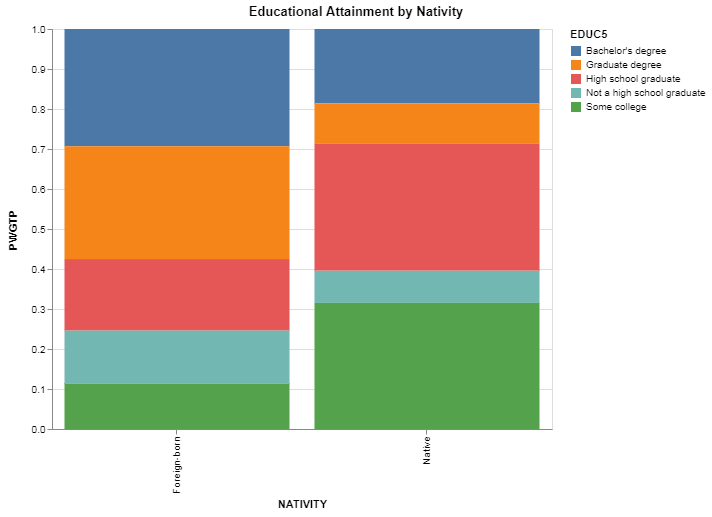

In [5]:
alt.Chart(data = data).mark_bar().encode(
    x = 'NATIVITY',
    y = 'PWGTP',
    color = 'EDUC5',
).properties(
    title = "Educational Attainment by Nativity",
    height = 400,
    width = 500,
)

It's very easy to customize it further too. For example, if you want to customize your X-axis you can use `alt.X()` instead of assigning a string directly to X:

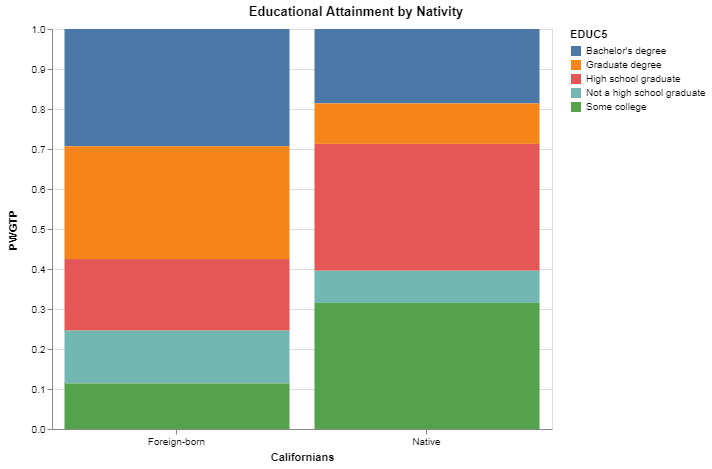

In [6]:
alt.Chart(data = data).mark_bar().encode(
    x = alt.X('NATIVITY', axis = alt.Axis(labelAngle=0, title = "Californians")),
    y = 'PWGTP',
    color = 'EDUC5',
).properties(
    title = "Educational Attainment by Nativity",
    height = 400,
    width = 500,
)

And do the same for the rest of the variables.

## More to come...